<a href="https://colab.research.google.com/github/ed-roberts-github/Previous-work/blob/main/support_vector_regression(SVR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [35]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [36]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [37]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Not splitting data set as in last example.

## Feature Scaling

Not coeffiecints multiplying each dependant variable so need need to apply feature scaling. (as learned before). Need to apply FS to both the level and the depedant variable (salary).

In general with FS:

-Don't apply to dummy variables resulting from OneHot encoding

-Don't apply when dependant variable has binary values 0/1 as values already in right range

-When dependant variable takes high values compared to other features you DO need to apply FS to all the features and the dependant variable to get them all within the same range

-You should apply FS AFTER you split data into test/training data

-You need to inverse transform FS at the end to get back to the orginal scale .

In [38]:
#Need to transform y into a 2d arry with salaries verticaly
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [39]:
#Applying scaling to both x and y 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

Still using sklearn libary as its generally the best for ML that isn't based on neural netwroks (deep learning)

In [40]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') #creating the SVR model, using the radial kernel

#now training the data
regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [41]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))
#need to apply the scaling to the 6.5 when predicting
#and inverse the prediction 

array([170370.0204065])

## Visualising the SVR results

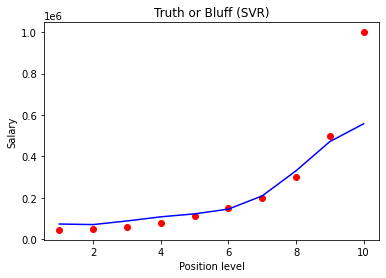

In [45]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue') 
#Don't need to transform the X in the predict because its already in the sclaed state remember
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

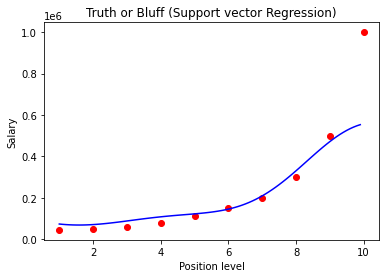

In [50]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1) #the 0.1 increases the incriment to smooth line
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (Support vector Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Notice curve is overfitted so the last point doesn't fit. Outliers not done wel by SVR.